# Identify the appropriate drug for the patiant

This notebook consist of a ML model what suggest the best fit drug for a patient. This helps doctors to work smatter

## Step 1 - Data Collection

Download the dataset

In [4]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2024-01-08 18:14:36--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-01-08 18:14:37 (2.20 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('drug200.csv')

<BarContainer object of 200 artists>

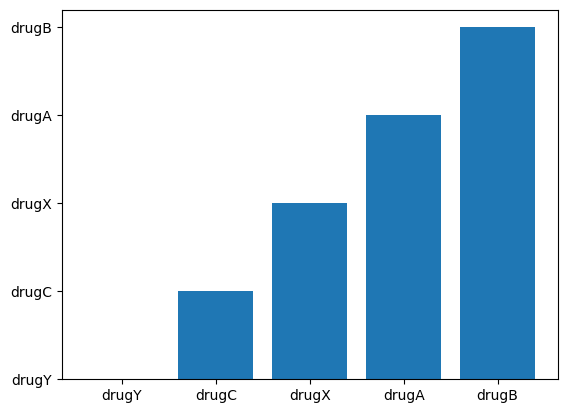

In [6]:
plt.bar(df['Drug'],df['Drug'])

(array([91., 16., 54., 23., 16.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

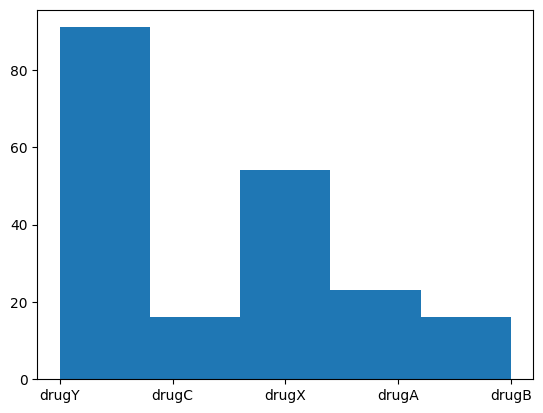

In [7]:
plt.hist(df['Drug'],bins=5)
# plt.xticks([0,1,2,3,4])

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


<BarContainer object of 5 artists>

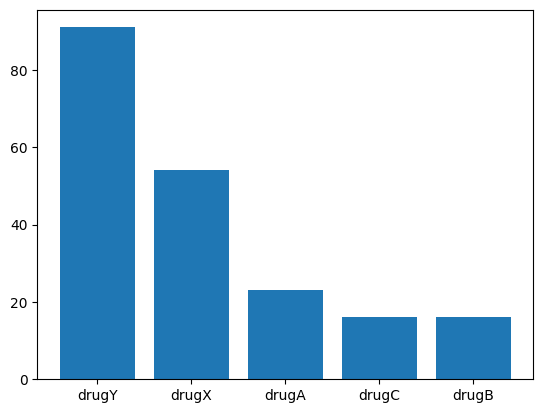

In [8]:
value_counts = df['Drug'].value_counts()
print(value_counts)

plt.bar(value_counts.index,value_counts.values)

## Step 2 - Data Preprocessing

also known as data cleaning
___


In [9]:
# Lets Explore the contents in the df

# List all columns
print(f'Columns are : \n {df.columns} \n')

# What is the shape of the dataset
print(f'The shape is : {df.shape} \n')

# Is there any null data
print('Checking Null')
print(df.isnull().sum())
print('\n')

# Describe the df
print('Description')
print(df.describe())
print('\n')

# Show the data
df.head()

Columns are : 
 Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object') 

The shape is : (200, 6) 

Checking Null
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Description
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000




,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#### Observation
- There is no null value in the dataset
- We need to encode `Sex`, `BP`, `Cholesterol`, and `Drug`

#### Further Room for Cleaning
- Should validate the Categorical values

#### Remove Unnecessary Columns

In [10]:
# There is no unnecessary columns in this dataset

['F' 'M']


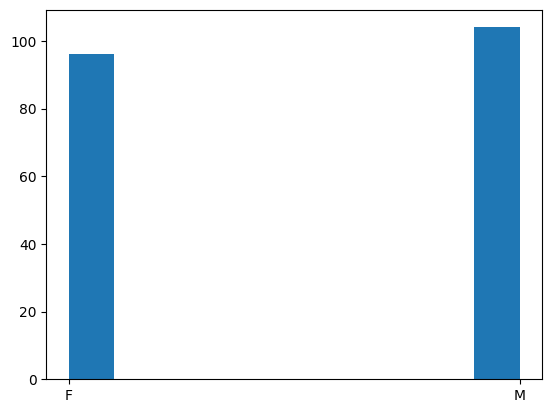

In [11]:
import matplotlib.pyplot as plt

# Unique values of Sex
print(df['Sex'].unique())

# Destribution of Sex
plt.hist(df['Sex'])
plt.show()

['HIGH' 'LOW' 'NORMAL']


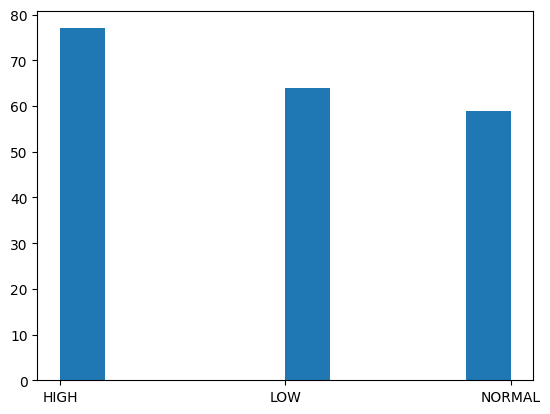

In [12]:
# Unique values of BP
print(df['BP'].unique())

# Destribution of BP
plt.hist(df['BP'])
plt.show()

['HIGH' 'NORMAL']


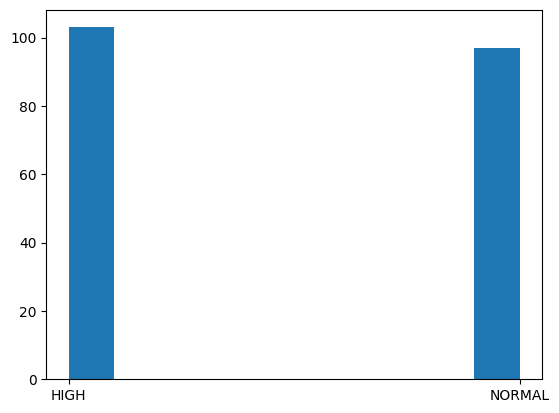

In [13]:
# Unique values of Cholesterol
print(df['Cholesterol'].unique())

# Destribution of Cholesterol
plt.hist(df['Cholesterol'])
plt.show()

#### Encode the categorical values

In [14]:
# Label Encoding for columns where the type is object

# Load necessary Libraries and classes
from sklearn.preprocessing import LabelEncoder

# Loop through columns and encode
for col in df.select_dtypes(include=['object']):
    # df.select_dtypes(include=['object']) will select all columns which the data type is a object, string is considered as a object here
    le = LabelEncoder()
    # This will replace the existing column with newly created encoded values
    df[col] = le.fit_transform(df[col])

# check whether the encoding is successful
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


Split the data

In [15]:
from sklearn.model_selection import train_test_split

# Select the independent and dependent variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_test, x_train, y_test, y_train = train_test_split(x,y)

## Step 3 & 4 - Choosing the right MODEL & Training the Model


In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(solver='lbfgs')


In [17]:
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 4, 4, 3, 3, 1, 4, 4, 4, 4, 4, 1, 3, 4, 1, 3, 4, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 1, 4, 4, 3, 3, 4, 4, 4, 4, 1, 3, 3, 4, 3, 4, 3, 2, 4,
       4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1,
       4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 2, 1, 4, 1, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 2, 4, 3, 1, 4, 4, 3, 3, 4, 3, 4, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 3, 3, 4, 4, 4, 1, 3, 3, 3, 2, 4, 3, 4, 4, 3, 1])

## Step 5 - Evaluating the Model

In [18]:
roc_auc_score?

Object `roc_auc_score` not found.


In [19]:
#Evaluation Metrics
all_metrics = {}


# Accuracy Score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
all_metrics['accuracy_score'] = score

# precision_score
from sklearn.metrics import precision_score
score = precision_score(y_test, y_pred, average=None)
all_metrics['precision_score'] = score

# recall_score
from sklearn.metrics import recall_score
score = recall_score(y_test, y_pred ,average=None)
all_metrics['recall_score'] = score

# f1_score
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average=None)
all_metrics['f1_score'] = score

# roc_auc_score
# from sklearn.metrics import roc_auc_score
# score = roc_auc_score(y_test,y_pred, multi_class='ovo')
# all_metrics['roc_auc_score'] = score

# confusion_matrix
from sklearn.metrics import confusion_matrix
score = confusion_matrix(y_test,y_pred)
all_metrics['confusion_matrix'] = score

# classification_report
from sklearn.metrics import classification_report
score = classification_report(y_test,y_pred)
all_metrics['classification_report'] = score



for k,v in all_metrics.items():
  print(k,v)
  print('\n')

# print(all_metrics)

accuracy_score 0.7466666666666667


precision_score [0.         0.53846154 0.75       0.76       0.77108434]


recall_score [0.         0.7        0.27272727 1.         0.91428571]


f1_score [0.         0.60869565 0.4        0.86363636 0.83660131]


confusion_matrix [[ 0  4  1  2 14]
 [ 0  7  0  0  3]
 [ 0  1  3  5  2]
 [ 0  0  0 38  0]
 [ 0  1  0  5 64]]


classification_report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.54      0.70      0.61        10
           2       0.75      0.27      0.40        11
           3       0.76      1.00      0.86        38
           4       0.77      0.91      0.84        70

    accuracy                           0.75       150
   macro avg       0.56      0.58      0.54       150
weighted avg       0.64      0.75      0.68       150





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13